# Descriptive Statistics: 
### Measure of central tendancy: Mean, Median, Mode
### Measure of variation: SD, var, z-score, CV
### Measure of position: quartiles

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import scipy
from scipy import stats
from scipy.stats import zscore, kurtosis, variation, scoreatpercentile
from scipy.stats.mstats import gmean  

In [2]:
import statistics
print(st.mean([1, 2, 3, 4, 4]))
print(st.stdev([1, 2, 3, 4, 4]))

2.8
1.3038404810405297


## Read the data

In [3]:
df = pd.read_csv("Data.csv")
df

,Annual income
0,62000.0
1,64000.0
2,49000.0
3,324000.0
4,1264000.0
5,54330.0
6,64000.0
7,51000.0
8,55000.0
9,48000.0


In [4]:
df.describe()

,Annual income
count,1.100000e+01
mean,1.898482e+05
std,3.652854e+05
min,4.800000e+04
25%,5.200000e+04
50%,5.500000e+04
75%,6.400000e+04
max,1.264000e+06


In [5]:
df.mean()

Annual income    189848.181818
dtype: float64

In [6]:
df.mean().round()

Annual income    189848.0
dtype: float64

## Geometric & Harmonic mean

In [12]:
stats.gmean(df)                     #multiply and do mean

array([86292.96812607])

In [14]:
stats.gmean(df.iloc[:, 0:1], axis=0) # axis=0 gives you the gm col wise

array([86292.96812607])

In [15]:
stats.gmean(df.iloc[:, 0:1], axis=1) # axis=1 gives you the gm row wise

array([  62000.,   64000.,   49000.,  324000., 1264000.,   54330.,
         64000.,   51000.,   55000.,   48000.,   53000.])

In [16]:
stats.hmean(df) # harmonic mean - reciprocals mean

array([65647.45574851])

## Median

In [17]:
df.median()

Annual income    55000.0
dtype: float64

### Mode

In [18]:
df.mode()

,Annual income
0,64000.0


In [19]:
range=df.max()-df.min()
range

Annual income    1216000.0
dtype: float64

## Variance Sample

In [20]:
df.var()

Annual income    1.334334e+11
dtype: float64

In [17]:
## Variance Population 

https://www.statisticshowto.datasciencecentral.com/population-variance/

## Standard Deviation

In [21]:
#df['Annual income'].std()
df.std()

Annual income    365285.380951
dtype: float64

In [22]:
s=df.var()
np.sqrt(s) ## SD using formula

Annual income    365285.380951
dtype: float64

In [23]:
np.std(df)

c:\Users\krish\OneDrive\Desktop\NCU\ACS\.venv\Lib\site-packages\numpy\_core\fromnumeric.py:4062: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


Annual income    348285.945135
dtype: float64

## Measure of Position

In [ ]:
df.quantile() # default quantile is Q2 (median)

Annual income    55000.0
Name: 0.5, dtype: float64

In [26]:
df.quantile(q=0.50, axis=0,)
# default axis=0

Annual income    55000.0
Name: 0.5, dtype: float64

In [27]:
df.describe().loc['50%']        #loc takes you to that index

Annual income    55000.0
Name: 50%, dtype: float64

In [28]:
df.quantile(q=0.2, axis=0)      #20% quantile

Annual income    51000.0
Name: 0.2, dtype: float64

In [29]:
df.quantile([0.2, 0.5])         #20 and 50

,Annual income
0.2,51000.0
0.5,55000.0


In [30]:
IQR=df.quantile(0.75) - df.quantile(0.25)
IQR

Annual income    12000.0
dtype: float64

In [32]:
scoreatpercentile(df, 50)           #value at 50 quartile 

np.float64(55000.0)

## z-scores

In [33]:
zscore(df) # using scipy
# directly using the function

array([[-0.36707821],
       [-0.3613358 ],
       [-0.40440386],
       [ 0.38517724],
       [ 3.084109  ],
       [-0.38910035],
       [-0.3613358 ],
       [-0.39866146],
       [-0.38717664],
       [-0.40727507],
       [-0.39291905]])

In [34]:
stats.zscore(df)

array([[-0.36707821],
       [-0.3613358 ],
       [-0.40440386],
       [ 0.38517724],
       [ 3.084109  ],
       [-0.38910035],
       [-0.3613358 ],
       [-0.39866146],
       [-0.38717664],
       [-0.40727507],
       [-0.39291905]])

In [37]:
zscore=(df-df.mean())/df.std()      #formula
zscore

,Annual income
0,-0.349995
1,-0.344520
2,-0.385584
3,0.367252
4,2.940583
5,-0.370993
6,-0.344520
7,-0.380109
8,-0.369158
9,-0.388322


## Multivariate analysis

In [38]:
import pandas as pd
iris = pd.read_csv('iris.data.csv', header=None, 
    names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

In [ ]:
iris.head()                 #multivariate means same no. of columns 

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [39]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris.describe(include="all")            #added things that aren't usually counted like species column

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [42]:
np.cov(iris['sepal_length'],iris['sepal_width'])[0,1]           #covarience

np.float64(-0.03926845637583891)

In [ ]:
iris.corr(numeric_only=True)                            #correlation

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [44]:
iris_specis = pd.DataFrame(iris['species'].value_counts())
iris_specis

,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [45]:
iris_specis['Relative Frequency'] = iris_specis['count'] 
iris_specis['Relative Frequency'] = iris_specis['Relative Frequency'].apply(lambda x: (x/iris_specis['count'].sum())*100)
iris_specis

,count,Relative Frequency
species,,
Iris-setosa,50,33.333333
Iris-versicolor,50,33.333333
Iris-virginica,50,33.333333


In [46]:
iris_specis['Relative Frequency'].sum()

np.float64(99.99999999999999)

In [47]:
iris_specis['Cumulative Frequency'] = iris_specis['Relative Frequency'].cumsum()
iris_specis

,count,Relative Frequency,Cumulative Frequency
species,,,
Iris-setosa,50,33.333333,33.333333
Iris-versicolor,50,33.333333,66.666667
Iris-virginica,50,33.333333,100.000000


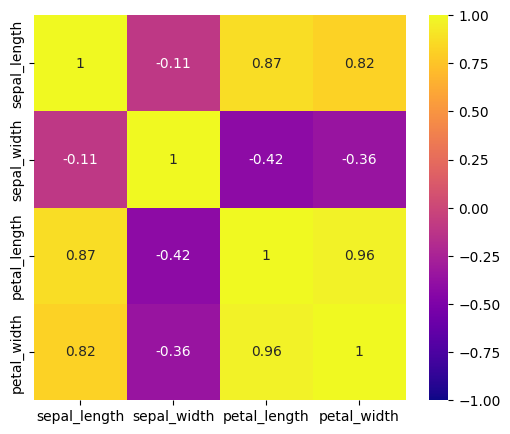

In [48]:
plt.figure(figsize=(6,5))
sns.heatmap(iris.corr(numeric_only=True), annot=True, cmap='plasma', vmin=-1, vmax=1) # corr instead of cor if all columns involved, cmap:coolwarm is good
# annot = True : mention correlation values in the heatmap.
plt.show()

In [ ]:
pd.crosstab(iris['petal_length'] > 3.758667, iris['petal_width'] > 1.198667)    #true false values

petal_width,False,True
petal_length,,
False,56,1
True,4,89
